# install Spark

In [761]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1- Data Integration

In [762]:
from pyspark.sql import SparkSession

In [763]:
spark=SparkSession.builder.appName('test_pyspark').getOrCreate()

In [764]:
houses = spark.read.format("csv").option("header", True).load("/content/FR1.csv")

In [765]:
row_count = houses.count()
print("Number of rows:", row_count)
column_count = len(houses.columns)
print("Number of columns:", column_count)

Number of rows: 13652
Number of columns: 13


In [766]:
all_files=["FR2.csv","IT1.csv","IT2.csv","TH1.csv","TH2.csv","US1.csv","US2.csv"]

In [767]:
all_dfs=[]
for file in all_files:
  temp = spark.read.format("csv").option("header", True).load("/content/"+file)
  all_dfs.append(temp)

In [768]:
for index in range(0, len(all_dfs)):
  print(all_dfs[index].dtypes)
print(houses.dtypes)

[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_meters', 'string'), ('room_count', 'string'), ('bathroom_count', 'string'), ('rent', 'string'), ('parking', 'string'), ('furnished', 'string'), ('description', 'string'), ('currency', 'string')]
[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_meters', 'string'), ('room_count', 'string'), ('bathroom_count', 'string'), ('rent', 'string'), ('parking', 'string'), ('furnished', 'string'), ('description', 'string'), ('currency', 'string')]
[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_meters', 'string'), ('room_count', 'string'), ('bathroom_count', 'string'), ('rent', 'string'), ('parking', 'string'), ('furnished', 'string'), ('description', 'string'), ('currency', 'string')]
[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_met

In [769]:
all_dfs[5]= all_dfs[5].drop("floor")
houses= houses.drop("floor")

In [770]:
for index in range(0, len(all_dfs)):
  print(all_dfs[index].dtypes)

[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_meters', 'string'), ('room_count', 'string'), ('bathroom_count', 'string'), ('rent', 'string'), ('parking', 'string'), ('furnished', 'string'), ('description', 'string'), ('currency', 'string')]
[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_meters', 'string'), ('room_count', 'string'), ('bathroom_count', 'string'), ('rent', 'string'), ('parking', 'string'), ('furnished', 'string'), ('description', 'string'), ('currency', 'string')]
[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_meters', 'string'), ('room_count', 'string'), ('bathroom_count', 'string'), ('rent', 'string'), ('parking', 'string'), ('furnished', 'string'), ('description', 'string'), ('currency', 'string')]
[('title', 'string'), ('property_type', 'string'), ('city', 'string'), ('country', 'string'), ('square_met

In [771]:
for index in range(len(all_dfs)):
    houses = houses.unionAll(all_dfs[index])


In [772]:
houses.show()

+--------------------+-------------+--------------------+-------+-------------+----------+--------------+-----+-------+---------+--------------------+--------+
|               title|property_type|                city|country|square_meters|room_count|bathroom_count| rent|parking|furnished|         description|currency|
+--------------------+-------------+--------------------+-------+-------------+----------+--------------+-----+-------+---------+--------------------+--------+
|Maison 6 pièces -...|        house|         QUATZENHEIM| france|          230|         6|             2| 2800|   True|    False|RARE ! A seulemen...|     EUR|
|Maison 8 pièces -...|        house|              PIBRAC| france|          202|         8|             0| 2400|  False|    False|A Pibrac dans un ...|     EUR|
|Maison 5 pièces -...|        house|             MOUVAUX| france|          121|         5|             1| 2300|   True|     True|BAIL DE 1 AN FERM...|     EUR|
|Maison  - 420m² -...|        house|    

In [773]:
row_count = houses.count()
print("Number of rows:", row_count)
column_count = len(houses.columns)
print("Number of columns:", column_count)

Number of rows: 114609
Number of columns: 12


In [774]:
print("{} partition(s)".format(houses.rdd.getNumPartitions()))

14 partition(s)


# 2- Data Cleaning

In [775]:
houses.printSchema()

root
 |-- title: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- square_meters: string (nullable = true)
 |-- room_count: string (nullable = true)
 |-- bathroom_count: string (nullable = true)
 |-- rent: string (nullable = true)
 |-- parking: string (nullable = true)
 |-- furnished: string (nullable = true)
 |-- description: string (nullable = true)
 |-- currency: string (nullable = true)



In [776]:
from pyspark.sql.functions import col
numerical_ = ['square_meters','room_count','rent','bathroom_count']
for attr in numerical_:
  houses=houses.withColumn(attr,col(attr).cast('int'))
houses.printSchema()

root
 |-- title: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- square_meters: integer (nullable = true)
 |-- room_count: integer (nullable = true)
 |-- bathroom_count: integer (nullable = true)
 |-- rent: integer (nullable = true)
 |-- parking: string (nullable = true)
 |-- furnished: string (nullable = true)
 |-- description: string (nullable = true)
 |-- currency: string (nullable = true)



In [777]:
from pyspark.sql.functions import col, count, isnan, when
df__ = houses.select(
    [count(when(isnan(c), c)).alias(c) for c in houses.columns]
)
df_ = houses.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in houses.columns]
)
df__.show()
df_.show()

+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+
|title|property_type|city|country|square_meters|room_count|bathroom_count|rent|parking|furnished|description|currency|
+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+
|    0|            0|   0|      0|            0|         0|             0|   0|      0|        0|          0|       0|
+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+

+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+
|title|property_type|city|country|square_meters|room_count|bathroom_count|rent|parking|furnished|description|currency|
+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+
|    1|            0|   0|      0|        20174

In [778]:
#count_=houses.groupBy(houses.columns).count().filter("count > 1")
#count_.show()

In [779]:
#count_.count()

#### Remove Duplicates

In [780]:
all_count= houses.count()
distinct_row_count = houses.distinct().count()
print("ALL Rows Count:",all_count)
print("Distinct Row Count:", distinct_row_count)
print("The Duplicates Row Count:",(all_count-distinct_row_count))

ALL Rows Count: 114609
Distinct Row Count: 110931
The Duplicates Row Count: 3678


In [781]:
houses = houses.dropDuplicates()

In [782]:
all_count= houses.count()
print("ALL Rows Count:",all_count)

ALL Rows Count: 110931


##### Distribution The Data 

<Axes: >

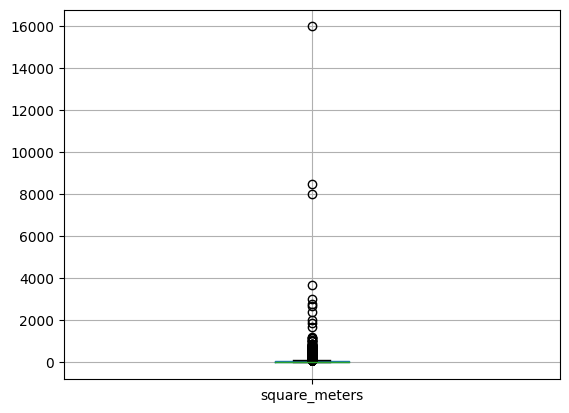

In [783]:
import pandas as pd

dfff=houses.toPandas()
dfff.boxplot('square_meters')

In [784]:
houses.select(median(col('rent'))).first()

Row(median(rent)=12000.0)

In [785]:
from pyspark.sql.functions import col, median
fill_attr=['square_meters','bathroom_count']
for attr in fill_attr:
  value_median=houses.select(median(col(attr))).first()[0]
  houses= houses.fillna(value_median, subset=[attr])
  print('The Median of '+attr+" :",value_median)


The Median of square_meters : 41.0
The Median of bathroom_count : 1.0


In [786]:
houses.show(200)

+--------------------+-------------+--------------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+--------------------+
|               title|property_type|                city|country|square_meters|room_count|bathroom_count|rent|parking|furnished|         description|            currency|
+--------------------+-------------+--------------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+--------------------+
|Maison 5 pièces -...|        house|            DARVAULT| france|          102|         5|             0|1250|  False|    False|Maison rénovée co...|                 EUR|
|Maison 4 pièces -...|        house|        VALENCIENNES| france|           52|         4|             0| 795|  False|     True|Citya Hainaut vou...|                 EUR|
|Maison 2 pièces -...|        house|      LA ROCHE POSAY| france|           57|         2|             0| 155|  False|     True|Appartement de 47

In [787]:
from pyspark.sql.functions import col, count, isnan, when

df_ = houses.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in houses.columns]
)
df_.show()

+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+
|title|property_type|city|country|square_meters|room_count|bathroom_count|rent|parking|furnished|description|currency|
+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+
|    1|            0|   0|      0|            0|         0|             0|   0|      0|        0|         15|       0|
+-----+-------------+----+-------+-------------+----------+--------------+----+-------+---------+-----------+--------+



In [788]:
categorical = ['property_type','country','parking','furnished','currency']
numerical= ['square_meters','room_count']


In [789]:
houses.printSchema()

root
 |-- title: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- square_meters: integer (nullable = true)
 |-- room_count: integer (nullable = true)
 |-- bathroom_count: integer (nullable = true)
 |-- rent: integer (nullable = true)
 |-- parking: string (nullable = true)
 |-- furnished: string (nullable = true)
 |-- description: string (nullable = true)
 |-- currency: string (nullable = true)



<Axes: >

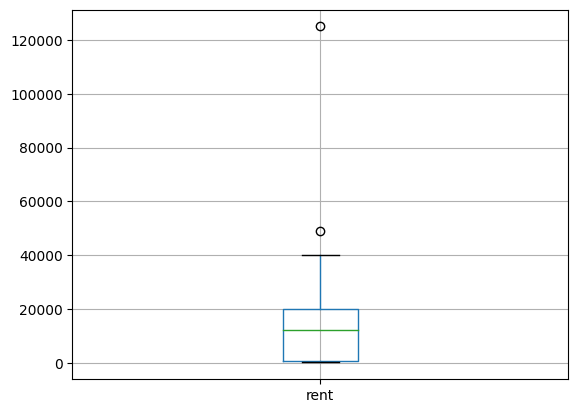

In [790]:
#to check the outliers
dfff.boxplot('rent')

<Axes: >

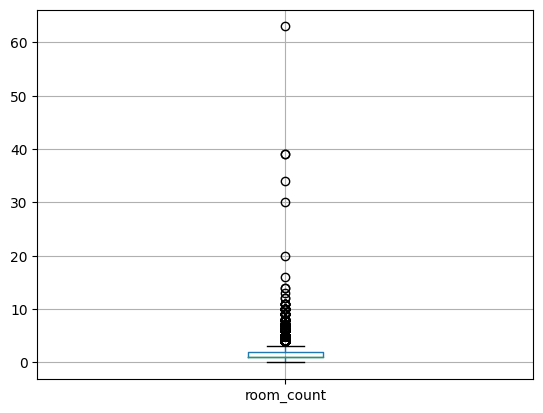

In [791]:
dfff.boxplot('room_count')

In [792]:
lis_drop=['title','city','description']
for i in lis_drop:
  houses= houses.drop(i)

In [793]:
all_count= houses.count()
distinct_row_count = houses.distinct().count()
print("ALL Rows Count:",all_count)
print("Distinct Row Count:", distinct_row_count)
print("The Duplicates Row Count:",(all_count-distinct_row_count))

ALL Rows Count: 110931
Distinct Row Count: 40495
The Duplicates Row Count: 70436


In [794]:
houses = houses.dropDuplicates()

In [795]:
print("ALL Rows Count:",houses.count())

ALL Rows Count: 40495


In [796]:
houses.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
property_type,40495,None,None,apartment,room
country,40495,None,None,Thailand,united_states
square_meters,40495,65.78602296579825,117.18430981054014,0,16000
room_count,40495,2.0074330164217806,1.3708971453431513,0,63
bathroom_count,40495,1.2104210396345227,0.9228393131621433,0,35
rent,40495,9020.361180392641,12321.791872562279,100,125000
parking,40495,None,None,False,True
furnished,40495,None,None,False,True
currency,40495,None,None,"""""plug and play"""" without any headaches or ex...","single XL bed with 14"""" memory foam"


In [797]:
houses.show(300)

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+
|        house| france|          106|         5|             1|3000|   True|    False|                 EUR|
|        house| france|           61|         3|             1| 725|   True|     True|                 EUR|
|        house| france|          104|         4|             1|1250|   True|    False|                 EUR|
|        house| france|          139|         7|             0|2790|  False|    False|                 EUR|
|        house| france|          100|         4|             0| 663|  False|    False|                 EUR|
|        house| france|           71|         4|             0|1000|  False|    False|                 EUR|
|        house| france|     

In [798]:
from pyspark.sql.functions import desc
df = houses.groupBy("rent").count().orderBy(desc("count"))
df.show()

+-----+-----+
| rent|count|
+-----+-----+
|40000|  976|
|35000|  913|
|25000|  776|
|30000|  775|
|20000|  600|
|15000|  465|
|18000|  454|
|22000|  451|
|28000|  441|
|  500|  431|
|  550|  387|
|12000|  380|
|  600|  370|
|  450|  369|
|  650|  363|
|  400|  355|
|16000|  352|
|  700|  349|
|23000|  347|
|38000|  343|
+-----+-----+
only showing top 20 rows



In [799]:
numerical_ = ['square_meters', 'room_count', 'rent']

for i in numerical_:
    q1 = houses.approxQuantile(i, [0.25], 0.01)[0]
    q3 = houses.approxQuantile(i, [0.75], 0.01)[0]
    iqr = (q3 - q1)
    iqr_rule=iqr *1.5
    
    houses = houses.filter((houses[i] >= q1 - iqr_rule) & (houses[i] <= q3 + iqr_rule))

    print(iqr)
    houses.select(i).show()

33.0
+-------------+
|square_meters|
+-------------+
|          106|
|           61|
|          104|
|          100|
|           71|
|           55|
|           96|
|           60|
|           34|
|           54|
|           56|
|           32|
|           14|
|           73|
|           41|
|          106|
|           56|
|           50|
|           59|
|           42|
+-------------+
only showing top 20 rows

1.0
+----------+
|room_count|
+----------+
|         3|
|         3|
|         3|
|         3|
|         1|
|         2|
|         2|
|         1|
|         1|
|         3|
|         2|
|         3|
|         2|
|         3|
|         2|
|         3|
|         3|
|         2|
|         1|
|         3|
+----------+
only showing top 20 rows

17455.0
+----+
|rent|
+----+
| 725|
| 490|
|1620|
| 658|
| 420|
| 525|
|1030|
| 360|
| 330|
| 720|
| 580|
|1300|
| 975|
| 690|
| 672|
| 445|
| 670|
| 695|
| 291|
| 910|
+----+
only showing top 20 rows



In [800]:
import pandas as pd
df_=houses.toPandas()


<Axes: >

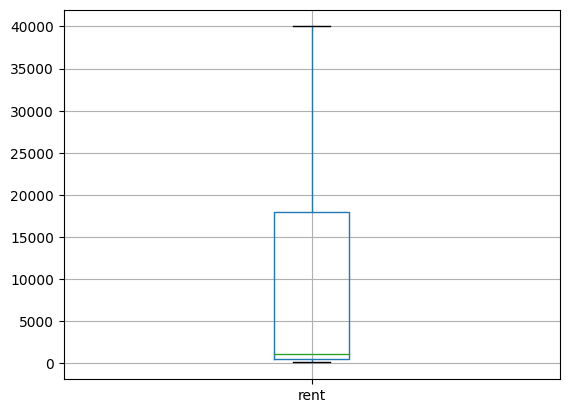

In [801]:
df_.boxplot('rent')

<Axes: >

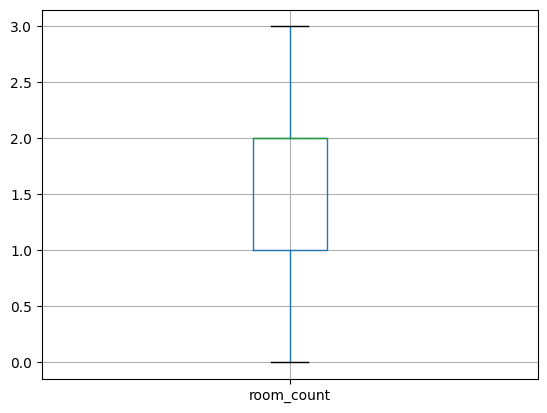

In [802]:
df_.boxplot('room_count')

<Axes: >

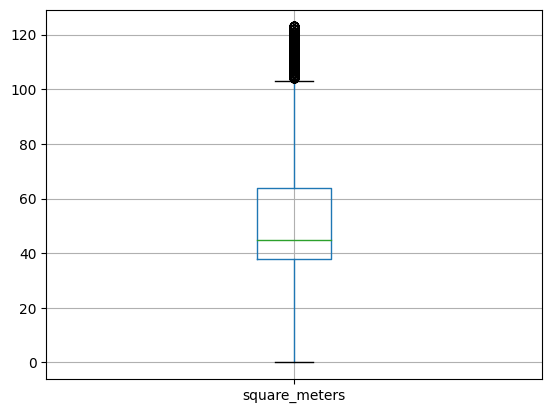

In [803]:
df_.boxplot('square_meters')

In [804]:
from pyspark.sql.functions import col, when

bins = [100, 460, 650, 1085, 13000, 25500]
labels = ['very low', 'low', 'moderate', 'high', 'very high']
houses = houses.withColumn('rent_category', 
                           when(col('rent').between(bins[0], bins[1]), labels[0])
                           .when(col('rent').between(bins[1], bins[2]), labels[1])
                           .when(col('rent').between(bins[2], bins[3]), labels[2])
                           .when(col('rent').between(bins[3], bins[4]), labels[3])
                           .when(col('rent').between(bins[4], bins[5]), labels[4])
                           .otherwise(labels[4]))

In [805]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

In [806]:
houses.select("rent_category").distinct().show()

+-------------+
|rent_category|
+-------------+
|          low|
|     very low|
|     moderate|
|         high|
|    very high|
+-------------+



In [807]:
house_level=houses.groupBy("rent_category").count()

In [808]:
house_level.show()

+-------------+-----+
|rent_category|count|
+-------------+-----+
|          low| 5698|
|     very low| 5579|
|     moderate| 5363|
|         high| 6073|
|    very high|10805|
+-------------+-----+



In [809]:
countris=houses.groupBy("country").count()
countris.show()

+-------------+-----+
|      country|count|
+-------------+-----+
|united_states| 1859|
|     thailand| 9278|
|       france|13541|
|     Thailand| 3262|
|        italy| 5578|
+-------------+-----+



In [810]:
from pyspark.sql.functions import lower
houses = houses.withColumn("country",lower(houses.country))
countris=houses.groupBy("country").count()
countris.show()

+-------------+-----+
|      country|count|
+-------------+-----+
|united_states| 1859|
|     thailand|12540|
|       france|13541|
|        italy| 5578|
+-------------+-----+



In [811]:
from pyspark.sql.functions import col


#categories = houses.select("rent_category").distinct()


In [812]:
#categories.show()

In [813]:
houses.printSchema()

root
 |-- property_type: string (nullable = true)
 |-- country: string (nullable = true)
 |-- square_meters: integer (nullable = true)
 |-- room_count: integer (nullable = true)
 |-- bathroom_count: integer (nullable = true)
 |-- rent: integer (nullable = true)
 |-- parking: string (nullable = true)
 |-- furnished: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- rent_category: string (nullable = false)



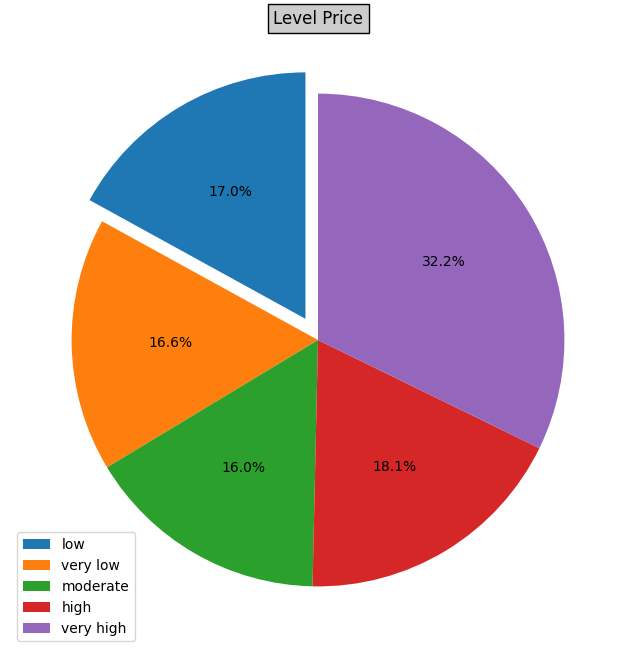

In [814]:
from matplotlib import pyplot as plt
import pandas as pd

try:
    df = house_level.toPandas()
    user_data = df['rent_category']
    count_data = df['count']
    fig = plt.figure(figsize=(8, 8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0)

    # Plot
    plt.pie(count_data, autopct='%1.1f%%', startangle=90, explode=explode)
    plt.title('Level Price', bbox={'facecolor': '0.8', 'pad': 4})
    plt.legend(user_data, loc="lower left")

    # Display the pie chart
    plt.show()
except Exception as e:
    print("An error occurred:", e)


<ipython-input-815-b8f8b49a9d3d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidth = 0.9, cmap = 'coolwarm')


<Axes: >

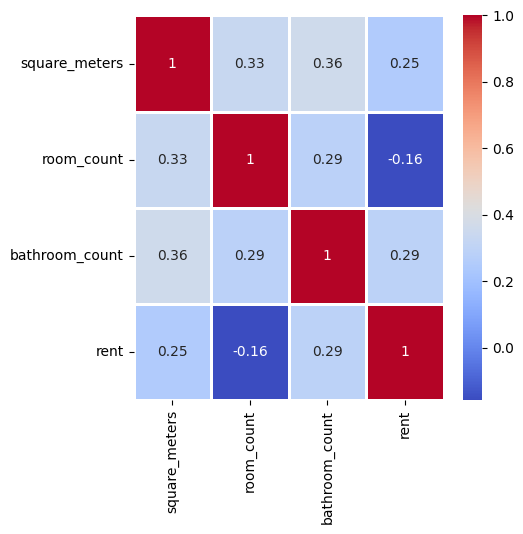

In [815]:
import matplotlib.pyplot as plt
import seaborn as sns
df=houses.toPandas()
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, linewidth = 0.9, cmap = 'coolwarm')

# 3 - Data Transformation

In [816]:
from pyspark.ml.feature import StringIndexer
convert_cate=StringIndexer(inputCol='rent_category',outputCol='rent_category_num')

my_dataset=convert_cate.fit(houses).transform(houses)

In [817]:
my_dataset.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+
|        house| france|           61|         3|             1| 725|   True|     True|                 EUR|     moderate|              4.0|
|        house| france|           55|         3|             0| 490|  False|    False|                 EUR|          low|              2.0|
|    apartment| france|           96|         3|             2|1620|   True|    False|                 EUR|         high|              1.0|
|    apartment| france|           60|         3|             2| 658|   True|     True|                 EUR|     moderate|              4.0|
|    apartment| fran

In [818]:
all_datasets=[]
indexrs=[StringIndexer(inputCol=col,outputCol=col+'_index') for col in categorical]
for indexr in indexrs:
  my_dataset=indexr.fit(my_dataset).transform(my_dataset)
  all_datasets.append(my_dataset)


In [819]:
encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexrs], outputCols=[col + "_encoded" for col in categorical])

In [820]:
for colm in all_datasets[0].columns:
  print(colm)

property_type
country
square_meters
room_count
bathroom_count
rent
parking
furnished
currency
rent_category
rent_category_num
property_type_index


In [821]:
for data_set in all_datasets:
  for colm in data_set.columns:
    my_dataset=data_set.withColumn(colm,col(colm))


In [822]:
my_dataset.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+
|        house| france|           61|         3|             1| 725|   True|     True|                 EUR|     moderate|              4.0|                1.0|          0.0|          1.0|            0.0|           0.0|
|        house| france|           55|         3|             0| 490|  False|    False|                 EUR|          low|   

<Axes: >

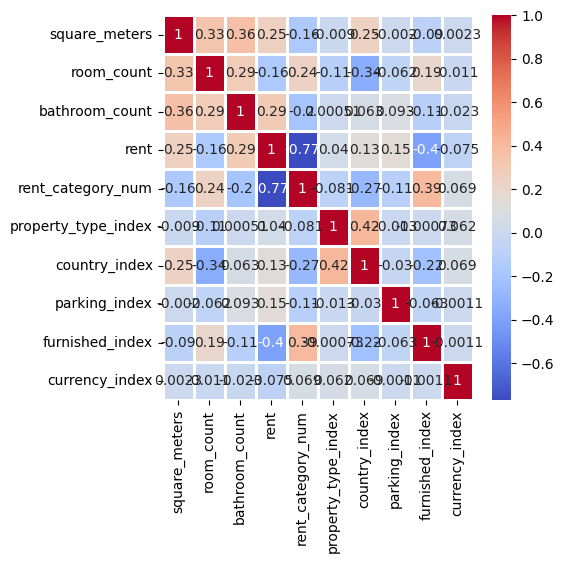

In [823]:
result__=my_dataset[['square_meters','room_count','bathroom_count','rent','rent_category_num','property_type_index','country_index','parking_index','furnished_index','currency_index']]
import pandas as pd
dff=result__.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(dff.corr(), annot = True, linewidth = 0.9, cmap = 'coolwarm')

<ipython-input-824-b30563a498dc>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  plot.scatter_matrix(df, ax=ax)


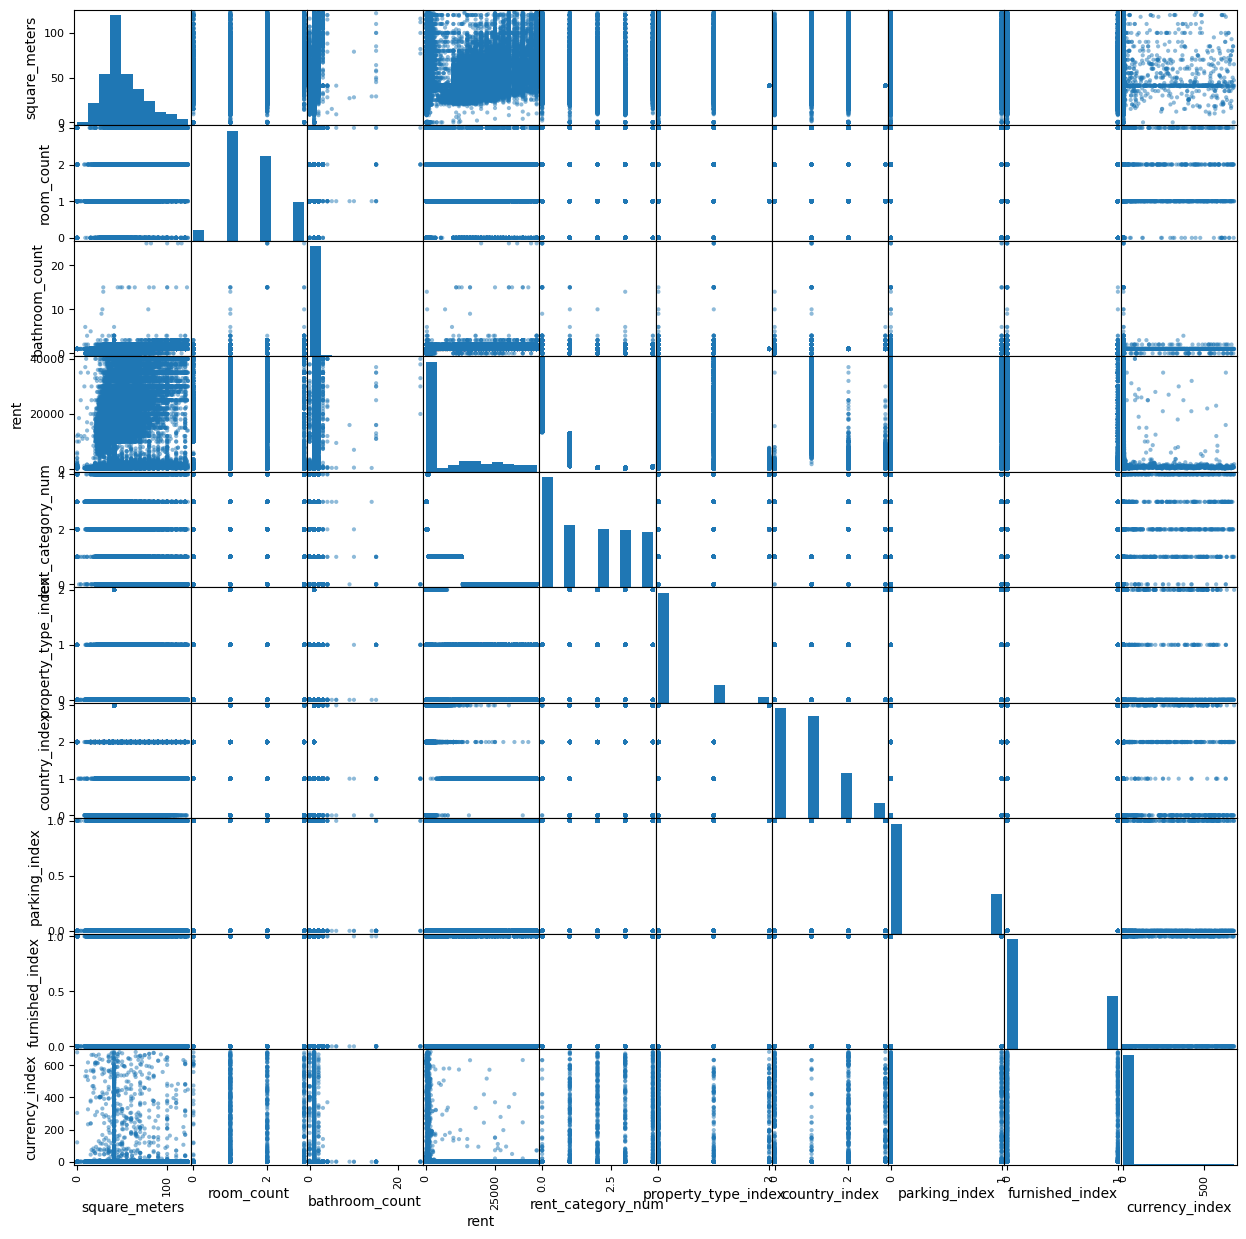

In [824]:
# Using Scatter matrix from pandas
import  pandas.plotting as plot
df = result__.toPandas()
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
plot.scatter_matrix(df, ax=ax)
plt.show()

In [825]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, MinMaxScaler


In [826]:
encoder=OneHotEncoder(inputCols=[attr+'_index' for attr in categorical],outputCols=[attr+'_encoded' for attr in categorical])

In [827]:
encoded_=encoder.fit(my_dataset).transform(my_dataset)

In [828]:
encoded_.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+
|        house| france|           61|         3|             1| 725|   Tr

In [829]:
encoder__2=OneHotEncoder(inputCols=[attr+'_index' for attr in categorical],outputCols=[attr+'_encoded' for attr in categorical],dropLast=False)
encoded__2=encoder__2.fit(my_dataset).transform(my_dataset)


In [830]:
encoded__2.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+
|        house| france|           61|         3|             1| 725|   Tr

In [831]:
encoded__2.printSchema()

root
 |-- property_type: string (nullable = true)
 |-- country: string (nullable = true)
 |-- square_meters: integer (nullable = true)
 |-- room_count: integer (nullable = true)
 |-- bathroom_count: integer (nullable = true)
 |-- rent: integer (nullable = true)
 |-- parking: string (nullable = true)
 |-- furnished: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- rent_category: string (nullable = false)
 |-- rent_category_num: double (nullable = false)
 |-- property_type_index: double (nullable = false)
 |-- country_index: double (nullable = false)
 |-- parking_index: double (nullable = false)
 |-- furnished_index: double (nullable = false)
 |-- currency_index: double (nullable = false)
 |-- property_type_encoded: vector (nullable = true)
 |-- country_encoded: vector (nullable = true)
 |-- parking_encoded: vector (nullable = true)
 |-- furnished_encoded: vector (nullable = true)
 |-- currency_encoded: vector (nullable = true)



In [832]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

In [833]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [834]:
assmbler=VectorAssembler(inputCols=numerical,outputCol='features_' )

In [835]:
output=assmbler.transform(encoded__2)

In [836]:
output.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+----------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded| features_|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+----------+
|        house| france|           61|   

In [837]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

In [838]:
scaler = MinMaxScaler(inputCol='features_',outputCol='scale_feature')
final_output_ = scaler.fit(output).transform(output)

In [839]:
'''scaler = MinMaxScaler(inputCol='features_',outputCol='scale_feature')
final_output_ = scaler.fit(output).transform(output)'''

"scaler = MinMaxScaler(inputCol='features_',outputCol='scale_feature')\nfinal_output_ = scaler.fit(output).transform(output)"

In [840]:
final_output_.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+----------+--------------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded| features_|       scale_feature|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+----------

In [841]:
final_output_=final_output_.withColumn('rent',col('rent').cast('int'))

In [842]:
assmbler_target=VectorAssembler(inputCols=['rent'],outputCol='target')


In [843]:

output___=assmbler_target.transform(final_output_)

In [844]:
output___.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+----------+--------------------+--------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded| features_|       scale_feature|  target|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+----------

In [845]:
final_output_.printSchema()

root
 |-- property_type: string (nullable = true)
 |-- country: string (nullable = true)
 |-- square_meters: integer (nullable = true)
 |-- room_count: integer (nullable = true)
 |-- bathroom_count: integer (nullable = true)
 |-- rent: integer (nullable = true)
 |-- parking: string (nullable = true)
 |-- furnished: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- rent_category: string (nullable = false)
 |-- rent_category_num: double (nullable = false)
 |-- property_type_index: double (nullable = false)
 |-- country_index: double (nullable = false)
 |-- parking_index: double (nullable = false)
 |-- furnished_index: double (nullable = false)
 |-- currency_index: double (nullable = false)
 |-- property_type_encoded: vector (nullable = true)
 |-- country_encoded: vector (nullable = true)
 |-- parking_encoded: vector (nullable = true)
 |-- furnished_encoded: vector (nullable = true)
 |-- currency_encoded: vector (nullable = true)
 |-- features_: vector (nullable = true

In [846]:
scaler = MinMaxScaler(inputCol='target',outputCol='scale_target')
final_output__ = scaler.fit(output___).transform(output___)


In [847]:
final_output__.show()

+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+---------------+-----------------+-----------------+----------+--------------------+--------+--------------------+
|property_type|country|square_meters|room_count|bathroom_count|rent|parking|furnished|            currency|rent_category|rent_category_num|property_type_index|country_index|parking_index|furnished_index|currency_index|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded| features_|       scale_feature|  target|        scale_target|
+-------------+-------+-------------+----------+--------------+----+-------+---------+--------------------+-------------+-----------------+-------------------+-------------+-------------+---------------+--------------+---------------------+---------------+--

In [848]:
attribute=['property_type','country','square_meters','room_count','bathroom_count','parking','furnished','currency','rent_category','property_type_index','country_index','parking_index','furnished_index','currency_index','features_','target']
for index in attribute:
  final_output__=final_output__.drop(index)

In [849]:
final_output__.show()

+----+-----------------+---------------------+---------------+---------------+-----------------+-----------------+--------------------+--------------------+
|rent|rent_category_num|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded|       scale_feature|        scale_target|
+----+-----------------+---------------------+---------------+---------------+-----------------+-----------------+--------------------+--------------------+
| 725|              4.0|        (3,[1],[1.0])|  (4,[0],[1.0])|  (2,[1],[1.0])|    (2,[0],[1.0])|  (684,[0],[1.0])|[0.49593495934959...|[0.01566416040100...|
| 490|              2.0|        (3,[1],[1.0])|  (4,[0],[1.0])|  (2,[0],[1.0])|    (2,[1],[1.0])|  (684,[0],[1.0])|[0.44715447154471...|[0.00977443609022...|
|1620|              1.0|        (3,[0],[1.0])|  (4,[0],[1.0])|  (2,[1],[1.0])|    (2,[1],[1.0])|  (684,[0],[1.0])|[0.78048780487804...|[0.0380952380952381]|
| 658|              4.0|        (3,[0],[1.0])|  (4,[0],[1.

In [850]:
out=final_output__.select('scale_target')
out.show(truncate=False)
out.printSchema()

+-----------------------+
|scale_target           |
+-----------------------+
|[0.015664160401002505] |
|[0.009774436090225564] |
|[0.0380952380952381]   |
|[0.013984962406015038] |
|[0.008020050125313283] |
|[0.010651629072681705] |
|[0.02330827067669173]  |
|[0.006516290726817043] |
|[0.0057644110275689225]|
|[0.015538847117794487] |
|[0.012030075187969926] |
|[0.030075187969924814] |
|[0.02192982456140351]  |
|[0.014786967418546366] |
|[0.014335839598997493] |
|[0.008646616541353383] |
|[0.014285714285714287] |
|[0.014912280701754387] |
|[0.0047869674185463664]|
|[0.02030075187969925]  |
+-----------------------+
only showing top 20 rows

root
 |-- scale_target: vector (nullable = true)



In [851]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
extract_value=udf(lambda v:float(v[0]),DoubleType())
final_output__=final_output__.withColumn('scale_target',extract_value('scale_target'))
final_output__.show()

+----+-----------------+---------------------+---------------+---------------+-----------------+-----------------+--------------------+--------------------+
|rent|rent_category_num|property_type_encoded|country_encoded|parking_encoded|furnished_encoded| currency_encoded|       scale_feature|        scale_target|
+----+-----------------+---------------------+---------------+---------------+-----------------+-----------------+--------------------+--------------------+
| 725|              4.0|        (3,[1],[1.0])|  (4,[0],[1.0])|  (2,[1],[1.0])|    (2,[0],[1.0])|  (684,[0],[1.0])|[0.49593495934959...|0.015664160401002505|
| 490|              2.0|        (3,[1],[1.0])|  (4,[0],[1.0])|  (2,[0],[1.0])|    (2,[1],[1.0])|  (684,[0],[1.0])|[0.44715447154471...|0.009774436090225564|
|1620|              1.0|        (3,[0],[1.0])|  (4,[0],[1.0])|  (2,[1],[1.0])|    (2,[1],[1.0])|  (684,[0],[1.0])|[0.78048780487804...|  0.0380952380952381|
| 658|              4.0|        (3,[0],[1.0])|  (4,[0],[1.

In [852]:
assmbler_final=VectorAssembler(inputCols=['rent_category_num','property_type_encoded','country_encoded','parking_encoded','furnished_encoded','currency_encoded','scale_feature'],outputCol='final_features')
houses_final = assmbler_final.transform(final_output__)


In [853]:
houses_final.take(1)

[Row(rent=725, rent_category_num=4.0, property_type_encoded=SparseVector(3, {1: 1.0}), country_encoded=SparseVector(4, {0: 1.0}), parking_encoded=SparseVector(2, {1: 1.0}), furnished_encoded=SparseVector(2, {0: 1.0}), currency_encoded=SparseVector(684, {0: 1.0}), scale_feature=DenseVector([0.4959, 1.0]), scale_target=0.015664160401002505, final_features=SparseVector(698, {0: 4.0, 2: 1.0, 4: 1.0, 9: 1.0, 10: 1.0, 12: 1.0, 696: 0.4959, 697: 1.0}))]

In [854]:
houses_final = houses_final.select(['final_features', 'scale_target'])
houses_final.show(truncate=False)

+-----------------------------------------------------------------------------------------------+---------------------+
|final_features                                                                                 |scale_target         |
+-----------------------------------------------------------------------------------------------+---------------------+
|(698,[0,2,4,9,10,12,696,697],[4.0,1.0,1.0,1.0,1.0,1.0,0.49593495934959353,1.0])                |0.015664160401002505 |
|(698,[0,2,4,8,11,12,696,697],[2.0,1.0,1.0,1.0,1.0,1.0,0.4471544715447155,1.0])                 |0.009774436090225564 |
|(698,[0,1,4,9,11,12,696,697],[1.0,1.0,1.0,1.0,1.0,1.0,0.7804878048780488,1.0])                 |0.0380952380952381   |
|(698,[0,1,4,9,10,12,696,697],[4.0,1.0,1.0,1.0,1.0,1.0,0.48780487804878053,1.0])                |0.013984962406015038 |
|(698,[0,1,4,8,11,12,696,697],[3.0,1.0,1.0,1.0,1.0,1.0,0.2764227642276423,0.3333333333333333])  |0.008020050125313283 |
|(698,[0,1,4,9,11,12,696,697],[2.0,1.0,1

#4 - Building model

In [855]:
train_data, test_data = houses_final.randomSplit([0.8, 0.2])

In [856]:
train_data.show()

+--------------------+--------------------+
|      final_features|        scale_target|
+--------------------+--------------------+
|(698,[0,1,4,8,10,...| 0.03884711779448622|
|(698,[0,1,4,8,10,...| 0.02862155388471178|
|(698,[0,1,4,8,10,...|  0.0318546365914787|
|(698,[0,1,4,8,10,...|0.029699248120300753|
|(698,[0,1,4,8,10,...| 0.04260651629072682|
|(698,[0,1,4,8,10,...| 0.02649122807017544|
|(698,[0,1,4,8,10,...| 0.02862155388471178|
|(698,[0,1,4,8,10,...|0.025062656641604012|
|(698,[0,1,4,8,10,...| 0.03614035087719299|
|(698,[0,1,4,8,10,...| 0.02481203007518797|
|(698,[0,1,4,8,10,...|0.026566416040100252|
|(698,[0,1,4,8,10,...|0.030776942355889726|
|(698,[0,1,4,8,10,...|0.029072681704260653|
|(698,[0,1,4,8,10,...| 0.05117794486215539|
|(698,[0,1,4,8,10,...| 0.07268170426065164|
|(698,[0,1,4,8,10,...|  0.0318546365914787|
|(698,[0,1,4,8,10,...|0.030075187969924814|
|(698,[0,1,4,8,10,...| 0.02862155388471178|
|(698,[0,1,4,8,10,...| 0.03401002506265664|
|(698,[0,1,4,8,10,...| 0.0361403

In [857]:
test_data.show()

+--------------------+--------------------+
|      final_features|        scale_target|
+--------------------+--------------------+
|(698,[0,1,4,8,10,...| 0.03829573934837093|
|(698,[0,1,4,8,10,...|0.028822055137844613|
|(698,[0,1,4,8,10,...| 0.03401002506265664|
|(698,[0,1,4,8,10,...| 0.02581453634085213|
|(698,[0,1,4,8,10,...| 0.02581453634085213|
|(698,[0,1,4,8,10,...| 0.03508771929824561|
|(698,[0,1,4,8,10,...|0.026541353383458647|
|(698,[0,1,4,8,10,...| 0.02681704260651629|
|(698,[0,1,4,8,10,...| 0.02744360902255639|
|(698,[0,1,4,8,10,...|0.027819548872180452|
|(698,[0,1,4,8,10,...|0.028571428571428574|
|(698,[0,1,4,8,10,...|0.028972431077694236|
|(698,[0,1,4,8,10,...|0.031203007518796993|
|(698,[0,1,4,8,10,...| 0.03258145363408521|
|(698,[0,1,4,8,10,...|0.034837092731829576|
|(698,[0,1,4,8,10,...|0.035338345864661655|
|(698,[0,1,4,8,10,...|0.040852130325814535|
|(698,[0,1,4,8,10,...| 0.04228070175438597|
|(698,[0,1,4,8,10,...| 0.04486215538847118|
|(698,[0,1,4,8,10,...| 0.0249373

### Linear Regression

In [858]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="final_features", labelCol="scale_target")
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)

In [859]:
predictions.show()

+--------------------+--------------------+--------------------+
|      final_features|        scale_target|          prediction|
+--------------------+--------------------+--------------------+
|(698,[0,1,4,8,10,...| 0.03829573934837093|  0.0471432206141332|
|(698,[0,1,4,8,10,...|0.028822055137844613|0.055536352071093115|
|(698,[0,1,4,8,10,...| 0.03401002506265664| 0.06392948352805301|
|(698,[0,1,4,8,10,...| 0.02581453634085213| 0.07171968576618717|
|(698,[0,1,4,8,10,...| 0.02581453634085213| 0.07171968576618717|
|(698,[0,1,4,8,10,...| 0.03508771929824561| 0.07171968576618717|
|(698,[0,1,4,8,10,...|0.026541353383458647| 0.06602776639229299|
|(698,[0,1,4,8,10,...| 0.02681704260651629| 0.06602776639229299|
|(698,[0,1,4,8,10,...| 0.02744360902255639| 0.06602776639229299|
|(698,[0,1,4,8,10,...|0.027819548872180452| 0.06602776639229299|
|(698,[0,1,4,8,10,...|0.028571428571428574| 0.06602776639229299|
|(698,[0,1,4,8,10,...|0.028972431077694236| 0.06602776639229299|
|(698,[0,1,4,8,10,...|0.0

In [860]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create an instance of RegressionEvaluator with labelCol and predictionCol parameters
evaluator = RegressionEvaluator(labelCol="scale_target", predictionCol="prediction")

# Calculate RMSE using the evaluator
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

# Calculate R2 using the evaluator
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Print the RMSE and R2 values
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Root Mean Squared Error (RMSE): 0.13290352889349055
R-squared (R2): 0.8186834878276074


In [861]:
results=lr_model.evaluate(test_data)
print('The accurecy: ',results.r2)

The accurecy:  0.8186834878276074


### Random Forest Regression

In [862]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
rf = RandomForestRegressor(featuresCol="final_features", labelCol='scale_target',numTrees=20, maxDepth=10)
# Train the model
model = rf.fit(train_data)
predictions = model.transform(test_data)

In [863]:
predictions.show()

+--------------------+--------------------+-------------------+
|      final_features|        scale_target|         prediction|
+--------------------+--------------------+-------------------+
|(698,[0,1,4,8,10,...| 0.03829573934837093|0.03263231752776357|
|(698,[0,1,4,8,10,...|0.028822055137844613|0.03356591172847505|
|(698,[0,1,4,8,10,...| 0.03401002506265664|0.03358650328541686|
|(698,[0,1,4,8,10,...| 0.02581453634085213|0.03228458471685011|
|(698,[0,1,4,8,10,...| 0.02581453634085213|0.03228458471685011|
|(698,[0,1,4,8,10,...| 0.03508771929824561|0.03228458471685011|
|(698,[0,1,4,8,10,...|0.026541353383458647|0.03424321595397098|
|(698,[0,1,4,8,10,...| 0.02681704260651629|0.03424321595397098|
|(698,[0,1,4,8,10,...| 0.02744360902255639|0.03424321595397098|
|(698,[0,1,4,8,10,...|0.027819548872180452|0.03424321595397098|
|(698,[0,1,4,8,10,...|0.028571428571428574|0.03424321595397098|
|(698,[0,1,4,8,10,...|0.028972431077694236|0.03424321595397098|
|(698,[0,1,4,8,10,...|0.0312030075187969

In [864]:
evaluator = RegressionEvaluator(labelCol='scale_target')
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Root Mean Squared Error (RMSE): 0.10582379355455428
Mean Squared Error (MSE): 0.011198675282276924
R-squared (R2): 0.8850441748634592


In [865]:
feature_columns=final_output__.columns
feature_columns.remove('rent')
feature_columns.remove('scale_feature')
feature_columns.remove('scale_target')

In [866]:
feature_importances = model.featureImportances
print("Feature Importance:")
for feature, importance in zip(feature_columns, feature_importances):
    print(feature, ":", importance)

Feature Importance:
rent_category_num : 0.4382049336502772
property_type_encoded : 0.0006005835520079354
country_encoded : 0.0018418573738667344
parking_encoded : 0.0004237454452569185
furnished_encoded : 0.07446791438644945
currency_encoded : 0.23547789527993065
